In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker, cm

In [2]:
wind = xr.open_dataset('/home/pab21003/class_marn5895/Final_Project/Data/New_ERA5.nc')
u = xr.open_dataset('/home/pab21003/class_marn5895/Final_Project/Data/OSCAR_zonal_current_2015.nc')
v = xr.open_dataset('/home/pab21003/class_marn5895/Final_Project/Data/OSCAR_meridional_current_2015.nc')
chl = xr.load_dataset('/home/pab21003/class_marn5895/Final_Project/Data/dataset-oc-glo-bio-multi-l4-chl_4km_monthly-rep_1637967441442.nc')
ssh = xr.open_dataset('/home/pab21003/class_marn5895/Final_Project/Data/dataset-duacs-rep-global-merged-allsat-phy-l4-monthly_1637960787662.nc')

In [3]:
#wind = wind.sel(longitude=slice(140,260),latitude=slice(30,-30))
#windspeed = np.sqrt(wind.u10**2 + wind.v10**2)
u

<xarray.Dataset>
Dimensions:         (LON1_1021: 1021, bnds: 2, LAT: 481, LEV: 1, TIME: 73)
Coordinates:
  * LON1_1021       (LON1_1021) float64 20.0 20.33 20.67 ... 359.3 359.7 360.0
  * LAT             (LAT) float64 -80.0 -79.67 -79.33 -79.0 ... 79.33 79.67 80.0
  * LEV             (LEV) float64 15.0
  * TIME            (TIME) datetime64[ns] 2015-01-01 ... 2016-01-01
Dimensions without coordinates: bnds
Data variables:
    LON1_1021_bnds  (LON1_1021, bnds) float64 ...
    LAT_bnds        (LAT, bnds) float64 ...
    TIME_bnds       (TIME, bnds) datetime64[ns] ...
    U               (TIME, LEV, LAT, LON1_1021) float32 ...
Attributes:
    history:      FERRET V6.5  26-Nov-21
    Conventions:  CF-1.0

In [4]:
surf_current_speed = np.sqrt(u.U**2 + v.V**2)

In [5]:
u = u.sel(LON1_1021=slice(140,280),LAT=slice(-30,30))
v =v.sel(LON1_1021=slice(140,280),LAT=slice(-30,30))

In [6]:
surf_current_speed = surf_current_speed.sel(LON1_1021=slice(140,280),LAT=slice(-30,30))
surf_current_speed = surf_current_speed.resample(TIME='1M').mean(dim='TIME').sel(TIME='2015')

In [7]:
ssh = ssh.sel(longitude=slice(140,280),latitude=slice(-30,30))

In [8]:
chl=chl.CHL.isel(time=0)

In [9]:
chl

<xarray.DataArray 'CHL' (lat: 1441, lon: 8640)>
array([[0.15672302, 0.15744674, 0.1628659 , ..., 0.15472147, 0.1538459 ,
        0.15486978],
       [0.15841176, 0.15903363, 0.15661494, ..., 0.15603392, 0.15741518,
        0.15576161],
       [0.15942845, 0.15819323, 0.15371129, ..., 0.1528282 , 0.15457533,
        0.15468372],
       ...,
       [0.04440017, 0.04540771, 0.04432725, ..., 0.04463675, 0.04522241,
        0.04618996],
       [0.04622834, 0.04649966, 0.04615233, ..., 0.04573853, 0.04631178,
        0.04659912],
       [0.04622385, 0.04694615, 0.04662963, ..., 0.04584743, 0.04709544,
        0.04804476]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2015-01-01
  * lat      (lat) float32 30.02 29.98 29.94 29.9 ... -29.85 -29.9 -29.94 -29.98
  * lon      (lon) float32 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
Attributes:
    input_files_reprocessings:  Processors versions: MODIS 2018.1/VIIRSN 2018...
    long_name:                  Chlorophyll-a concentration - Mean of the bin...
    valid_min:                  0.0
    valid_max:                  1000.0
    standard_name:              mass_concentration_of_chlorophyll_a_in_sea_water
    units:                      milligram m-3
    type:                       surface
    _ChunkSizes:                [  1 256 256]

In [96]:
lonchl = (chl.lon+360)%360
chl = chl.assign_coords({'lon': np.sort(lonchl)})

In [97]:
chl.assign_coords?

Signature: chl.assign_coords(coords=None, **coords_kwargs)
Docstring:
Assign new coordinates to this object.

Returns a new object with all the original data in addition to the new
coordinates.

Parameters
----------
coords : dict, optional
    A dict where the keys are the names of the coordinates
    with the new values to assign. If the values are callable, they are
    computed on this object and assigned to new coordinate variables.
    If the values are not callable, (e.g. a ``DataArray``, scalar, or
    array), they are simply assigned. A new coordinate can also be
    defined and attached to an existing dimension using a tuple with
    the first element the dimension name and the second element the
    values for this new coordinate.
**coords_kwargs : optional
    The keyword arguments form of ``coords``.
    One of ``coords`` or ``coords_kwargs`` must be provided.

Returns
-------
assigned : same type as caller
    A new object with the new coordinates in addition to the exist

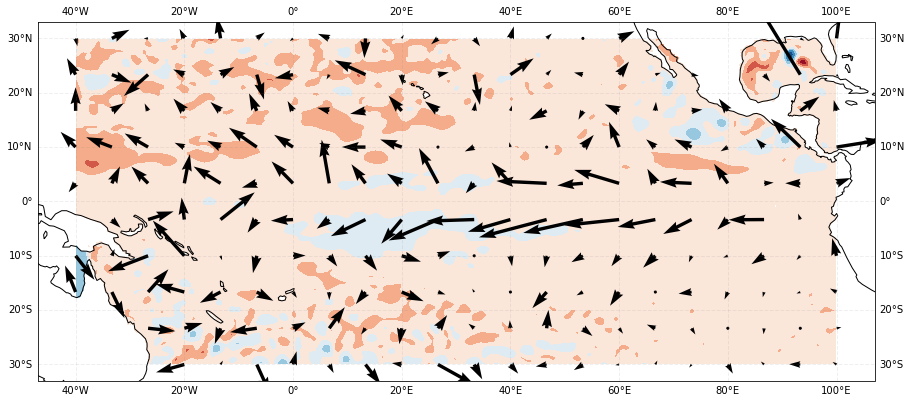

In [25]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# plot quick map with positions


plt.figure(figsize=(15,8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.gridlines(crs=ccrs.PlateCarree(central_longitude=180), draw_labels=True,
             linewidth=1, color='gray', alpha=0.12, linestyle='--')
ax.coastlines()

ax.contourf(ssh.longitude, ssh.latitude,ssh.sla.isel(time=0),cmap='RdBu',transform=ccrs.PlateCarree())
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

skip=20
lon_skipped =  u.LON1_1021[::skip]
lat_skipped = u.LAT[::skip]
kw_vec = {
    'scale': 8
}

u_vel= u.U.isel(TIME=0,LEV=0).sel(LON1_1021=lon_skipped,LAT =lat_skipped).values
v_vel = v.V.isel(TIME=0,LEV=0).sel(LON1_1021=lon_skipped,LAT =lat_skipped).values
ax.quiver(lon_skipped, 
           lat_skipped,
           u_vel,
           v_vel,transform=ccrs.PlateCarree(),**kw_vec)



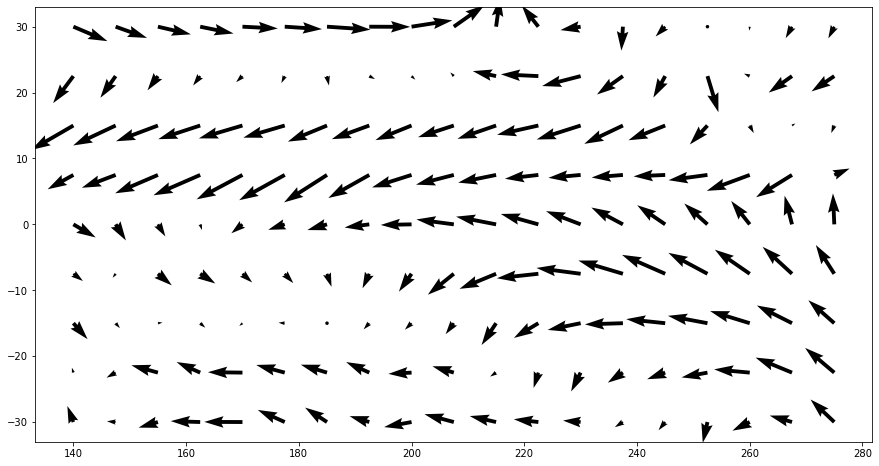

In [22]:


plt.figure(figsize=(15,8))
skip=30
lon_wind_skipped =  wind.longitude[::skip]
lat_wind_skipped = wind.latitude[::skip]
kw_vec = {
    'scale': 150
}


plt.quiver(lon_wind_skipped, 
           lat_wind_skipped,
           wind.u.isel(time=0).sel(longitude=lon_wind_skipped,latitude =lat_wind_skipped),
           wind.v.isel(time=0).sel(longitude=lon_wind_skipped,latitude =lat_wind_skipped),**kw_vec)


In [27]:
chl.coords['lon'] = (chl.coords['lon'] + 360) % 360
chl= chl.sortby(chl.lon)

In [28]:
chl

<xarray.DataArray 'CHL' (lat: 1441, lon: 8640)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.04080743, 0.03950938, 0.04038283, ..., 0.04048467, 0.04046581,
        0.0405265 ],
       [0.0406877 , 0.04016471, 0.04074843, ..., 0.04136277, 0.04134686,
        0.04135778],
       [0.0420937 , 0.04194529, 0.04120186, ..., 0.04145135, 0.04160022,
        0.04225502]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2015-01-01
  * lat      (lat) float32 30.02 29.98 29.94 29.9 ... -29.85 -29.9 -29.94 -29.98
  * lon      (lon) float32 0.02084 0.0625 0.1042 0.1458 ... 359.9 359.9 360.0
Attributes:
    input_files_reprocessings:  Processors versions: MODIS 2018.1/VIIRSN 2018...
    long_name:                  Chlorophyll-a concentration - Mean of the bin...
    valid_min:                  0.0
    valid_max:                  1000.0
    standard_name:              mass_concentration_of_chlorophyll_a_in_sea_water
    units:                      milligram m-3
    type:                       surface
    _ChunkSizes:                [  1 256 256]

In [94]:
### Resample every month
### and plot the January month 
chl.where((chl.lon>=140)&(chl.lon<=-80),drop=True)
#chl.where(,drop=True)

<xarray.DataArray 'CHL' (lat: 1441, lon: 0)>
array([], shape=(1441, 0), dtype=float32)
Coordinates:
    time     datetime64[ns] 2015-01-01
  * lat      (lat) float32 30.02 29.98 29.94 29.9 ... -29.85 -29.9 -29.94 -29.98
  * lon      (lon) float32 
Attributes:
    input_files_reprocessings:  Processors versions: MODIS 2018.1/VIIRSN 2018...
    long_name:                  Chlorophyll-a concentration - Mean of the bin...
    valid_min:                  0.0
    valid_max:                  1000.0
    standard_name:              mass_concentration_of_chlorophyll_a_in_sea_water
    units:                      milligram m-3
    type:                       surface
    _ChunkSizes:                [  1 256 256]

In [87]:
chl

<xarray.DataArray 'CHL' (lat: 1441, lon: 0)>
array([], shape=(1441, 0), dtype=float32)
Coordinates:
    time     datetime64[ns] 2015-01-01
  * lat      (lat) float32 30.02 29.98 29.94 29.9 ... -29.85 -29.9 -29.94 -29.98
  * lon      (lon) float32 
Attributes:
    input_files_reprocessings:  Processors versions: MODIS 2018.1/VIIRSN 2018...
    long_name:                  Chlorophyll-a concentration - Mean of the bin...
    valid_min:                  0.0
    valid_max:                  1000.0
    standard_name:              mass_concentration_of_chlorophyll_a_in_sea_water
    units:                      milligram m-3
    type:                       surface
    _ChunkSizes:                [  1 256 256]

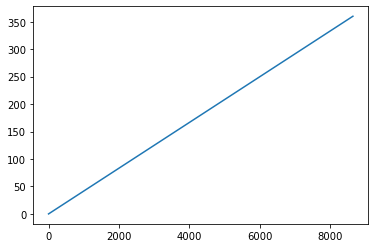

In [85]:
fig = plt.figure(figsize=(8,8))
plt.contourf(chl.CHL.isel(time=0).lon,chl.CHL.isel(time=0).lat,chl.CHL.isel(time=0),locator=ticker.LogLocator())

In [29]:
fig = plt.figure(figsize=(8,8))
plt.contourf(chl.CHL.lon,chl.CHL.lat,chl.CHL,locator=ticker.LogLocator())

AttributeError: 'DataArray' object has no attribute 'CHL'

<Figure size 576x576 with 0 Axes>

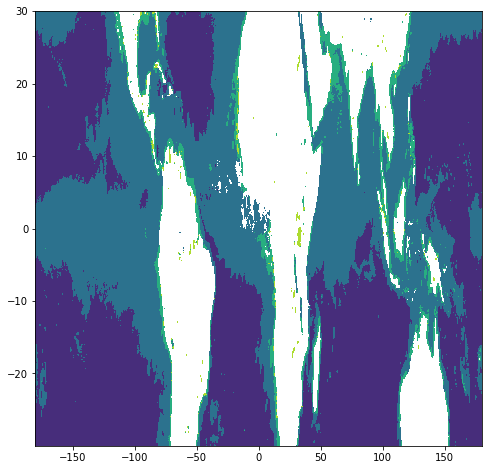

In [55]:
fig = plt.figure(figsize=(8,8))
plt.contourf(chl.CHL.isel(time=0).lon,chl.CHL.isel(time=0).lat,chl.CHL.isel(time=0),locator=ticker.LogLocator())

In [82]:
chl.sel(lon=slice(140,-80))

<xarray.DataArray 'CHL' (lat: 1441, lon: 0)>
array([], shape=(1441, 0), dtype=float32)
Coordinates:
    time     datetime64[ns] 2015-01-01
  * lat      (lat) float32 30.02 29.98 29.94 29.9 ... -29.85 -29.9 -29.94 -29.98
  * lon      (lon) float32 
Attributes:
    input_files_reprocessings:  Processors versions: MODIS 2018.1/VIIRSN 2018...
    long_name:                  Chlorophyll-a concentration - Mean of the bin...
    valid_min:                  0.0
    valid_max:                  1000.0
    standard_name:              mass_concentration_of_chlorophyll_a_in_sea_water
    units:                      milligram m-3
    type:                       surface
    _ChunkSizes:                [  1 256 256]